<a href="https://colab.research.google.com/github/sksk2ah/i_m/blob/main/css_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
train_df = pd.read_csv('/content/train.csv')

In [ ]:
train_df.head(3)

 - 연속형 : 대출금액, 연간소득, 부채_대비_소득_비율, 총계좌수, 최근_2년간_연체_횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수
 - 범주형 : 주택소유상태, 대출기간, 근로기간, 대출목적, 대출등급

'부채_대비_소득_비율'이 높고 '총상환원금', '총상환이자'가 크면 등급이 높을 것이다.

'연체계좌수'는 전체 데이터 중 약 550건으로 너무 작아 학습이 힘들 것으로 예상 따라서 '총연체금액'도 변수에 설정 어려울 것으로 판단.
대출 등급별 총 계좌의 평균도 비슷함.. 모델에 넣으니 중요도 낮음

In [ ]:
grade_by_count_account = train_df.groupby('대출등급')['ID'].count()
grade_by_count_account

대출등급
A    16772
B    28817
C    27623
D    13354
E     7354
F     1954
G      420
Name: ID, dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [ ]:
a = train_df.groupby('총연체금액')['ID'].count() != 0.0
a.count()

In [ ]:
train_df.describe(include = 'all')

In [ ]:
train_df['대출금액_로그'] = np.log(train_df['대출금액'] + 1)
train_df['연간소득_로그'] = np.log(train_df['연간소득'] + 1)
train_df['총상환원금_로그'] = np.log(train_df['총상환원금'] + 1)
train_df['총상환이자_로그'] = np.log(train_df['총상환이자'] + 1)

In [ ]:
# !sudo apt-get install -y fonts-nanum

# !sudo fc-cache -fv

# !rm ~/.cache/matplotlib -rf

In [ ]:
# 근로기간 전처리
train_df.loc[train_df['근로기간'] == "Unknown", '근로기간'] = 0
train_df.loc[train_df['근로기간'].isin(["< 1 year", "<1year", "<1 year"]), '근로기간'] = 0.5
train_df.loc[train_df['근로기간'].isin(["1 year", "1 years"]), '근로기간'] = 1
train_df.loc[train_df['근로기간'].isin(["2 years"]), '근로기간'] = 2
train_df.loc[train_df['근로기간'].isin(["3", "3 years"]), '근로기간'] = 3
train_df.loc[train_df['근로기간'].isin(["4 years"]), '근로기간'] = 4
train_df.loc[train_df['근로기간'].isin(["5 years"]), '근로기간'] = 5
train_df.loc[train_df['근로기간'].isin(["6 years"]), '근로기간'] = 6
train_df.loc[train_df['근로기간'].isin(["7 years"]), '근로기간'] = 7
train_df.loc[train_df['근로기간'].isin(["8 years"]), '근로기간'] = 8
train_df.loc[train_df['근로기간'].isin(["9 years"]), '근로기간'] = 9
train_df.loc[train_df['근로기간'].isin(["10+ years", "10+years"]), '근로기간'] = 10

train_df['근로기간'] = train_df['근로기간'].astype(int)
#train_df

In [ ]:
# 주택소유상태 전처리
train_df.loc[train_df['주택소유상태'].isin(["RENT", "ANY"]), '주택소유상태'] = 1
train_df.loc[train_df['주택소유상태'].isin(["OWN"]), '주택소유상태'] = 2
train_df.loc[train_df['주택소유상태'].isin(["MORTGAGE"]), '주택소유상태'] = 3

#train_df

In [ ]:
#대출목적 전처리
train_df.loc[train_df['대출목적'] == "기타", '대출목적'] = 1
train_df.loc[train_df['대출목적'] == "부채 통합", '대출목적'] = 3
train_df.loc[train_df['대출목적'] == "소규모 사업", '대출목적'] = 2
train_df.loc[train_df['대출목적'] == "신용 카드", '대출목적'] = 1
train_df.loc[train_df['대출목적'] == "의료", '대출목적'] = 1
train_df.loc[train_df['대출목적'] == "이사", '대출목적'] = 1
train_df.loc[train_df['대출목적'] == "자동차", '대출목적'] = 2
train_df.loc[train_df['대출목적'] == "재생 에너지", '대출목적'] = 2
train_df.loc[train_df['대출목적'] == "주요 구매", '대출목적'] = 2
train_df.loc[train_df['대출목적'] == "주택", '대출목적'] = 3
train_df.loc[train_df['대출목적'] == "주택 개선", '대출목적'] = 3
train_df.loc[train_df['대출목적'] == "휴가", '대출목적'] = 1
#train_df

# train_df.loc[train_df['대출목적'] == "휴가", "신용 카드", "의료", "이사", '대출목적'] = 1
# train_df.loc[train_df['대출목적'] == "소규모 사업", "자동차", "재생 에너지", "주요 구매", '대출목적'] = 2
# train_df.loc[train_df['대출목적'] == "부채 통합", "주택 개선", "주택", '대출목적'] = 3

In [ ]:
train_df['부채_대비_소득_비율'].describe()

# 부채_대비_소득_비율 ESD이상치 처리
proportion_mean = np.mean(train_df['부채_대비_소득_비율'])
proportion_std = np.std(train_df['부채_대비_소득_비율'])
upper_limit = proportion_mean + 3*proportion_std
lower_limit = proportion_mean - 3*proportion_std
print(upper_limit, lower_limit)

# upper_limit보다 큰 값
cond = train_df['부채_대비_소득_비율'] > upper_limit
train_df[cond]

# 상한값을 초과하는 행의 '부채_대비_소득_비율' 열을 상한값으로 바꿈
train_df.loc[cond, '부채_대비_소득_비율'] = upper_limit
train_df.describe()[['부채_대비_소득_비율']]
# 비율이 비정상적으로 높은 경우 제거하려고 했으나 연간소득이 0이거나 대출금액이 높아 일어나는 문제로 판단, 대출등급이 낮고 유의미한 수치라 생각돼서 제거 안함

120.0877453145014 -81.328565510983


,부채_대비_소득_비율
count,96294.000000
mean,19.261104
std,8.749092
min,0.000000
25%,12.650000
50%,18.740000
75%,25.540000
max,120.087745


In [ ]:
# # 총계좌수 ESD이상치 처리
# bad_account_mean = np.mean(train_df['총계좌수'])
# bad_account_std = np.std(train_df['총계좌수'])
# upper_limit2 = bad_account_mean + 3*bad_account_std
# lower_limit2 = bad_account_mean - 3*bad_account_std
# print(upper_limit2, lower_limit2)

# # upper_limit보다 큰 값
# cond2 = train_df['총계좌수'] > upper_limit2
# cond2

# train_df[cond2]
# # 비정상적으로 많은 계좌 처리
# train_df.loc[cond2, '총계좌수'] = bad_account_std

# train_df.describe()

In [ ]:
# 총계좌수 ESD이상치 처리
bad_account_median = np.median(train_df['총계좌수'])  # 중앙값 계산
mad = np.median(np.abs(train_df['총계좌수'] - bad_account_median))  # 중앙값 절대 편차 계산
upper_limit = bad_account_median + 3 * 1.4826 * mad
lower_limit = bad_account_median - 3 * 1.4826 * mad
print(upper_limit, lower_limit)

# upper_limit보다 큰 값 또는 lower_limit보다 작은 값
cond2 = (train_df['총계좌수'] > upper_limit) | (train_df['총계좌수'] < lower_limit)

train_df[cond2]
# 중앙값으로 대체
train_df.loc[cond2, '총계좌수'] = bad_account_median
train_df.describe()

59.5824 -11.5824


,대출금액,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출금액_로그,연간소득_로그,총상환원금_로그,총상환이자_로그
count,9.629400e+04,96294.000000,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,96294.000000,96294.000000,96294.000000
mean,1.830400e+07,5.653976,9.392672e+07,19.261104,24.750961,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,16.533311,18.198796,12.583618,11.890929
std,1.032908e+07,3.883755,9.956871e+07,8.749092,11.007222,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,0.667026,0.540068,3.176492,3.058164
min,1.200000e+06,0.000000,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,13.997833,0.000000,0.000000,0.000000
25%,1.020000e+07,2.000000,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,16.137898,17.869033,12.636468,11.810189
50%,1.680000e+07,6.000000,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,16.636890,18.172219,13.300839,12.567255
75%,2.400000e+07,10.000000,1.128000e+08,25.540000,31.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,16.993564,18.541127,13.869124,13.253772
max,4.200000e+07,10.000000,1.080000e+10,120.087745,59.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000,17.553180,23.102812,17.552131,15.547771


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.histplot(train_df['총계좌수'])

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.histplot(train_df['총계좌수'])

In [ ]:
# 대출기간을 숫자형으로 변환
train_df['대출기간'] = train_df['대출기간'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

# 결과 확인
print(train_df[['대출기간']])


       대출기간
0        36
1        60
2        36
3        36
4        60
...     ...
96289    36
96290    60
96291    36
96292    36
96293    36

[96294 rows x 1 columns]


In [ ]:
def overdue_account(account):
    if account >= 1:
        return 1
    elif account < 1:
        return 0

train_df['최근_2년간_연체_횟수'] = train_df['최근_2년간_연체_횟수'].apply(overdue_account)
#train_df

In [ ]:
def own_home(home):
    if home == 'RENT':
        return 1
    elif home == 'OWN':
        return 2
    elif home == 'MORTGAGE':
        return 3
    else:
        return 0  # 알 수 없는 값을 처리하기 위한 기본값 설정

train_df['주택소유상태'].apply(own_home)
#train_df


0        0
1        0
2        0
3        0
4        0
        ..
96289    0
96290    0
96291    0
96292    0
96293    0
Name: 주택소유상태, Length: 96294, dtype: int64

In [ ]:
train_df['상환원금비율'] = train_df['총상환원금']/train_df['대출금액']*100
train_df['월상환금'] = round(train_df['대출금액']/train_df['대출기간'])
train_df['대출금액대비상환'] = (train_df['총상환원금_로그'] + train_df['총상환이자_로그']) / train_df['대출금액_로그']
train_df['월상환금대비대출금액'] = train_df['대출금액'] / train_df['월상환금']

In [ ]:
train_df.dropna()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,...,연체계좌수,대출등급,대출금액_로그,연간소득_로그,총상환원금_로그,총상환이자_로그,상환원금비율,월상환금,대출금액대비상환,월상환금대비대출금액
0,TRAIN_00000,12480000,36,6,1,72000000,18.90,15,3,0,...,0.0,C,16.339638,18.092177,0.000000,0.000000,0.000000,346667.0,0.000000,35.999965
1,TRAIN_00001,14400000,60,10,3,130800000,22.33,21,3,0,...,0.0,B,16.482739,18.689180,12.830869,12.363337,2.594250,240000.0,1.528521,60.000000
2,TRAIN_00002,12000000,36,5,3,96000000,8.60,14,3,0,...,0.0,A,16.300417,18.379859,13.741482,11.931274,7.738700,333333.0,1.574975,36.000036
3,TRAIN_00003,14400000,36,8,3,132000000,15.09,15,3,0,...,0.0,C,16.482739,18.698312,12.694116,11.938905,2.262667,400000.0,1.494474,36.000000
4,TRAIN_00004,18000000,60,0,1,71736000,25.39,19,2,0,...,0.0,B,16.705882,18.088503,12.339471,11.911413,1.269667,300000.0,1.451637,60.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36,10,3,210000000,9.33,33,1,0,...,0.0,C,16.482739,19.162618,13.789763,13.106577,6.767917,400000.0,1.631788,36.000000
96290,TRAIN_96290,28800000,60,10,3,132000000,5.16,25,3,0,...,0.0,E,17.175886,18.698312,13.277192,13.658956,2.026833,480000.0,1.568254,60.000000
96291,TRAIN_96291,14400000,36,1,3,84000000,11.24,22,1,0,...,0.0,A,16.482739,18.246327,14.213702,12.393535,10.341167,400000.0,1.614249,36.000000
96292,TRAIN_96292,15600000,36,5,3,66330000,17.30,21,3,1,...,0.0,D,16.562782,18.010153,14.136411,13.614712,8.835692,433333.0,1.675511,36.000028


In [ ]:
train_df.info()

In [ ]:
train_df.groupby('대출등급')['월상환금'].mean().round(0)

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='대출금액')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='월상환금대비대출금액')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='대출기간')

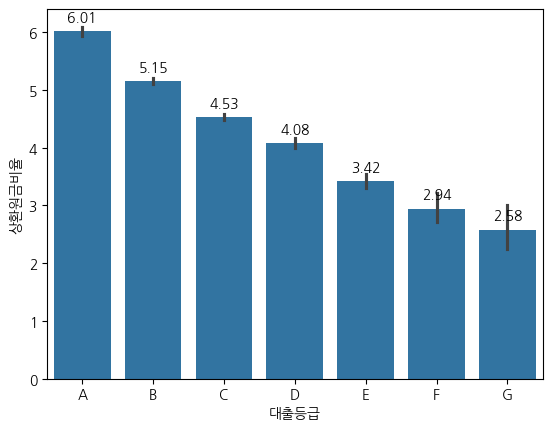

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='상환원금비율')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='총연체금액')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='총상환이자')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='총상환원금')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='대출목적')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='부채_대비_소득_비율')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
# 데이터 정의
sorted_train_df = train_df.sort_values('대출등급', ascending=True)
# 바 차트 그리기
ax = sns.barplot(data=sorted_train_df, x='대출등급', y='연간소득')
# 값 표시하기
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='주택소유상태')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='근로기간')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='총계좌수')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='최근_2년간_연체_횟수')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='연체계좌수')

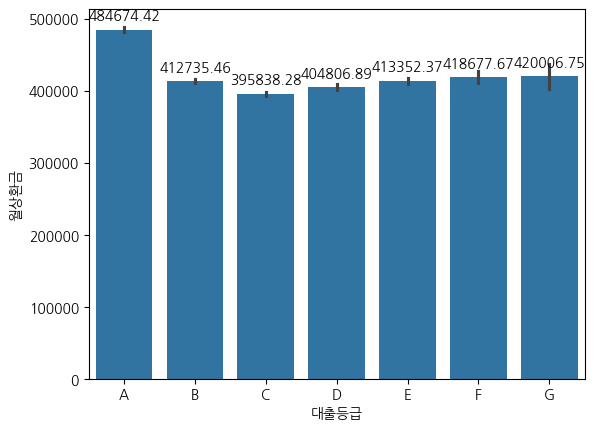

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='월상환금')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(train_df.sort_values('대출등급', ascending = True), x= '대출등급', y='대출금액대비상환')

- 범주형인 대출등급을 예측하는 것이기 때문에 Logistic Regression 사용

In [ ]:
#x변수 : 부채_대비_소득_비율, Y변수 : 대출등급
X_1 = train_df[['부채_대비_소득_비율']]
y_true = train_df[['대출등급']]

In [ ]:
# plt.rcParams['font.family'] = 'NanumGothic'
# sns.pairplot(train_df)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lor = LogisticRegression()

model_lor = LogisticRegression()
model_lor.fit(X_1, y_true)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
def get_att(x):
    #x모델을 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

In [ ]:
get_att(model_lor)

클래스 종류 ['A' 'B' 'C' 'D' 'E' 'F' 'G']
독립변수 갯수 1
들어간 독립변수(x)의 이름 ['부채_대비_소득_비율']
가중치 [[-0.03532246]
 [-0.02123747]
 [ 0.00276881]
 [ 0.02951855]
 [ 0.03949811]
 [ 0.03859556]
 [-0.05382109]]
바이어스 [ 1.45952151  1.78067919  1.28545263  0.00503166 -0.84036336 -2.17067717
 -1.51964447]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# X 변수와 y 변수 설정
X_1 = train_df[['부채_대비_소득_비율', '총상환원금', '총상환이자']]
y_true = train_df['대출등급']

# Logistic Regression 모델 생성 및 훈련
model_lor = LogisticRegression(multi_class='auto')
model_lor.fit(X_1, y_true)

# 모델 속성 출력 함수
def get_att(x):
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

# 모델 속성 출력
get_att(model_lor)

# 성능 메트릭 계산 함수
def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1-score', f1_score(true, pred, average='weighted'))

# 예측 및 성능 메트릭 출력
y_pred_1 = model_lor.predict(X_1)
get_metrics(y_true, y_pred_1)


클래스 종류 ['A' 'B' 'C' 'D' 'E' 'F' 'G']
독립변수 갯수 3
들어간 독립변수(x)의 이름 ['부채_대비_소득_비율' '총상환원금' '총상환이자']
가중치 [[-2.70579348e-10  9.91423535e-06 -1.40295857e-05]
 [ 1.00744311e-08  8.20417579e-06 -6.64877195e-06]
 [ 1.06746269e-08  6.12560857e-06 -2.04229375e-06]
 [-3.99199298e-09  3.73802691e-06  4.62535292e-07]
 [-6.32379285e-09  4.00523073e-07  2.97382063e-06]
 [-5.37221988e-09 -7.79793505e-06  7.22443636e-06]
 [-4.79047296e-09 -2.05846346e-05  1.20598592e-05]]
바이어스 [ 1.44081296e-10  6.36411723e-10  4.50686201e-10 -3.47431007e-10
 -3.72506014e-10 -2.72683251e-10 -2.38558948e-10]
정확도 0.6073275593494922
f1-score 0.6099277798512808


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# X 변수와 y 변수 설정

# '근로기간' - 약간 떨어짐
# '연간소득' - 약간 떨어짐
# '부채_대비_소득_비율' - 약간 떨어짐
# '총계좌수' - 약간 떨어짐
# '대출목적' - 약간 떨어짐
# '최근_2년간_연체_횟수' - 약간 떨어짐
X_1 = train_df[['상환원금비율', '대출금액대비상환', '총상환원금_로그', '총상환이자_로그', '월상환금', '대출금액_로그', '대출기간']]#, '연체계좌수', '총연체금액'
y_true = train_df['대출등급']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_true, test_size=0.2, random_state=42)

# Random Forest 모델 생성 및 훈련
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# 모델 속성 출력 함수
def get_att(x):
    print('중요도:', x.feature_importances_)

# 모델 속성 출력
get_att(model_rf)

# 예측
y_pred = model_rf.predict(X_test)

# 성능 메트릭 계산 함수
def get_metrics(true, pred):
    print('정확도:', accuracy_score(true, pred))
    print('F1-score:', f1_score(true, pred, average='weighted'))

# 성능 메트릭 출력
get_metrics(y_test, y_pred)


중요도: [0.47174534 0.14481726 0.13349004 0.12823359 0.04737571 0.04832219
 0.02601586]
정확도: 0.9477127576717379
F1-score: 0.9476570368413817


In [ ]:
# 고객점수 계산
weight = {
    '대출기간': -0.1,
    '상환원금비율': 1.25,
    '총상환이자': -0.4,
    '총상환원금': 0.25
}

def normalize_score(score):
    # 최소값과 최대값 계산
    min_score = min(score)
    max_score = max(score)

    # 점수를 0에서 1000 사이의 범위로 변환
    normalized_score = [(s - min_score) / (max_score - min_score) * 1000 for s in score]

    return normalized_score

# 고객 점수 계산
train_df['고객점수'] = (
    weight['대출기간'] * train_df['대출기간'] +
    weight['상환원금비율'] * train_df['상환원금비율'] +
    weight['총상환이자'] * train_df['총상환이자'] +
    weight['총상환원금'] * train_df['총상환원금']
)

# 정규화된 점수 계산
normalized_score = normalize_score(train_df['고객점수'])

# train_df에 정규화된 점수 열 추가
train_df['정규화된_고객점수'] = normalized_score

#train_df.head(5)

In [ ]:
train_df.describe()

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

# 대출등급에 따른 정규화된_고객점수의 평균 계산
mean_scores = train_df.groupby('대출등급')['정규화된_고객점수'].mean().reset_index()

# 바그래프 그리기
sns.barplot(data=mean_scores, x='대출등급', y='정규화된_고객점수', estimator=sum)

# 차트에 값 표시
for idx, value in enumerate(mean_scores['정규화된_고객점수']):
    plt.text(idx, value, f'{value:.2f}', ha='center', va='bottom')

# 차트 출력
plt.show()

In [ ]:
train_df.groupby('대출등급')['정규화된_고객점수'].mean().round(2)

대출등급
A    166.77
B    159.39
C    153.54
D    147.14
E    140.02
F    129.99
G    122.14
Name: 정규화된_고객점수, dtype: float64

In [ ]:
# 대출등급 할당 함수 정의
def assign_loan_grade(score):
    if score > 159.40:
        return 'A'
    elif 153.54 < score <= 159.40:
        return 'B'
    elif 147.14 < score <= 153.54:
        return 'C'
    elif 140.02 < score <= 147.14:
        return 'D'
    elif 130.00 < score <= 140.02:
        return 'E'
    elif 122.14 < score <= 130.00:
        return 'F'
    else:
        return 'G'

# 각 고객에 대한 대출등급 할당
train_df['예측_대출등급'] = train_df['정규화된_고객점수'].apply(assign_loan_grade)


In [ ]:
# 대출등급이 일치하는 행만 선택
matching_grades_df = train_df[train_df['대출등급'] == train_df['예측_대출등급']]

# 일치하는 행 수 계산
matching_count = len(matching_grades_df)

# 전체 데이터 수
total_count = len(train_df)

# 정확도 계산
accuracy = matching_count / total_count

print(f"정확도: {accuracy:.2%}")

정확도: 39.34%


In [ ]:
fin_df_sort = train_df.sort_values(by = ['정규화된_고객점수'], ascending=False).reset_index(drop=True)

fin_df_sort = fin_df_sort.reset_index()

fin_df_sort

In [ ]:
def assign_loan_grade(score):
    if score <= 16772:
        return 'A'
    elif 16773 <= score <= 45589:
        return 'B'
    elif 45590 <= score <= 73212:
        return 'C'
    elif 73213 <= score <= 86567:
        return 'D'
    elif 86568 <= score <= 93922:
        return 'E'
    elif 93923 <= score <= 95877:
        return 'F'
    else:
        return 'G'



# 각 고객에 대한 대출등급 할당
fin_df_sort['예측_대출등급'] = fin_df_sort['index'].apply(assign_loan_grade)

fin_df_sort.head(10)

,index,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,...,연간소득_로그,총상환원금_로그,총상환이자_로그,상환원금비율,월상환금,대출금액대비상환,월상환금대비대출금액,고객점수,정규화된_고객점수,예측_대출등급
0,0,TRAIN_70652,42000000,36,10,2,426000000,16.52,29,1,...,19.869950,17.552131,12.852917,99.895086,1166667.0,1.732167,35.999990,1.033635e+07,1000.000000,A
1,1,TRAIN_18804,42000000,60,1,1,209792400,23.44,23,1,...,19.161629,17.499224,14.341373,94.747371,700000.0,1.813950,60.000000,9.271820e+06,912.690861,A
2,2,TRAIN_16053,42000000,36,10,1,104400000,27.45,51,3,...,18.463740,17.418864,13.615386,87.431343,1166667.0,1.768013,35.999990,8.852945e+06,878.336038,A
3,3,TRAIN_53147,35550000,60,10,3,93600000,26.68,20,3,...,18.354541,17.386451,14.316512,100.000000,592500.0,1.823429,60.000000,8.227470e+06,827.036448,A
4,4,TRAIN_80144,42000000,36,2,3,97200000,18.21,39,3,...,18.392281,17.332533,13.397976,80.199971,1166667.0,1.750709,35.999990,8.157626e+06,821.308075,A
5,5,TRAIN_34868,35280000,36,6,1,106200000,12.14,42,1,...,18.480835,17.303072,12.112185,92.704354,980000.0,1.692592,36.000000,8.103806e+06,816.893874,A
6,6,TRAIN_35973,36000000,60,4,3,102000000,25.84,18,3,...,18.440483,17.383956,14.591579,98.504000,600000.0,1.837777,60.000000,7.996312e+06,808.077579,A
7,7,TRAIN_93039,36000000,60,0,3,124800000,10.05,20,1,...,18.642223,17.309429,13.584301,91.429633,600000.0,1.775601,60.000000,7.911346e+06,801.108937,A
8,8,TRAIN_26055,33600000,36,5,2,168000000,20.15,23,3,...,18.939475,17.320391,14.069567,99.040107,933333.0,1.811304,36.000013,7.803792e+06,792.287611,A
9,9,TRAIN_45922,42000000,36,7,1,92880000,21.63,35,3,...,18.346819,17.191688,13.638183,69.663571,1166667.0,1.756369,35.999990,6.979757e+06,724.702776,A


In [ ]:
# 대출등급이 일치하는 행만 선택
matching_grades_df = fin_df_sort[fin_df_sort['대출등급'] == fin_df_sort['예측_대출등급']]

# 일치하는 행 수 계산
matching_count = len(matching_grades_df)

# 전체 데이터 수
total_count = len(fin_df_sort)

# 정확도 계산
accuracy = matching_count / total_count

print(f"정확도: {accuracy:.2%}")

정확도: 39.30%


In [ ]:
# 데이터 수
total_data = 96294

# 각 등급별 데이터 수 계산
num_a = 19500
num_b = 58273 - 19500
num_c = 86161 - 58273
num_d = 97000 - 86161
num_e = 95500 - 97000
num_f = 96500 - 95500
num_g = total_data - 96500

# 각 등급별 비율 계산
ratio_a = num_a / total_data * 100
ratio_b = num_b / total_data * 100
ratio_c = num_c / total_data * 100
ratio_d = num_d / total_data * 100
ratio_e = num_e / total_data * 100
ratio_f = num_f / total_data * 100
ratio_g = num_g / total_data * 100

# 결과 출력
print("A등급 비율: {:.2f}%".format(ratio_a))
print("B등급 비율: {:.2f}%".format(ratio_b))
print("C등급 비율: {:.2f}%".format(ratio_c))
print("D등급 비율: {:.2f}%".format(ratio_d))
print("E등급 비율: {:.2f}%".format(ratio_e))
print("F등급 비율: {:.2f}%".format(ratio_f))
print("G등급 비율: {:.2f}%".format(ratio_g))


A등급 비율: 20.25%
B등급 비율: 40.27%
C등급 비율: 28.96%
D등급 비율: 11.26%
E등급 비율: -1.56%
F등급 비율: 1.04%
G등급 비율: -0.21%
